In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem1.csv")
df

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5
2236,4001,1946,Together,64014.0,2,1,406,0,30,0,0,7,8,2,5,7
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3


# 머신러닝 (50점)

## 1. 데이터 전처리 및 군집생성
### 1-1. 결측치를 확인하고, 결측치를 제거하시오(EDA)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 280.1+ KB


- Marital_Status만 변수형 변수, 나머지는 수치형 변수임

- Income 컬럼에 24개(약 1%)의 결측치 존재
    => 결측치가 있는 행을 제거

In [148]:
##결측치 제거
df = df.dropna()

df.shape ##24개 행 제거된 것 확인

(2216, 16)

In [149]:
df.describe(include='all')

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
unique,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5588.353339,1968.820397,NaN,52247.251354,0.441787,0.505415,305.091606,26.356047,166.995939,37.637635,27.028881,2.323556,4.085289,2.671029,5.800993,5.319043
std,3249.376275,11.985554,NaN,25173.076661,0.536896,0.544181,337.327920,39.793917,224.283273,54.752082,41.072046,1.923716,2.740951,2.926734,3.250785,2.425359
min,0.000000,1893.000000,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,NaN,35303.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,NaN,51381.500000,0.000000,0.000000,174.500000,8.000000,68.000000,12.000000,8.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8421.750000,1977.000000,NaN,68522.000000,1.000000,1.000000,505.000000,33.000000,232.250000,50.000000,33.000000,3.000000,6.000000,4.000000,8.000000,7.000000


- Marital_Status(범주형 변수)는 8개의 범주를 가지고 있음.
- 평균값에 비해 min/max 값이 굉장히 차이가 많이나는 변수들이 있음  
    -> boxplot으로 확인해보자

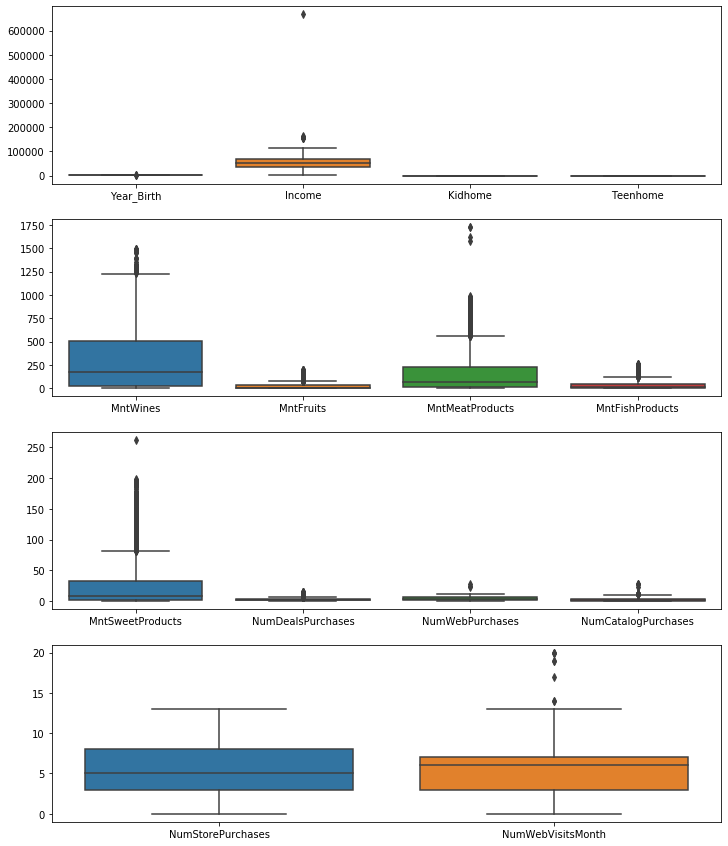

In [150]:
df_temp = df.drop(columns=['ID','Marital_Status']) ##ID 및 범주형 변수 제외
fig, axes = plt.subplots(4,1,figsize=(12,15))
sns.boxplot(data = df_temp.iloc[:,:4], ax=axes[0])
sns.boxplot(data = df_temp.iloc[:,4:8], ax=axes[1])
sns.boxplot(data = df_temp.iloc[:,8:12], ax=axes[2])
sns.boxplot(data = df_temp.iloc[:,12:], ax=axes[3])
plt.show()

- boxplot 확인결과 이상치를 가지고 있는 변수들이 다수보임
  => 이상치 제거 필요    

### 1-2. 이상치를 제거하는 방법을 서술하고, 이상치 제거 후 결과를 통계적으로 나타내시오.

이상치 제거에는 여러가지 방법이 있다.

1. 사분위수 방법  
    - 사분위수 방법은 데이터분포와 값의 크기를 이용하여, 대략적인 이상치 구간을 설정해주는 방법이다.
    - 간단하고, 직관적이여서, 이상치 제거에서 많이 활용된다.  
    [방법]  
    1) 3사분위 수와 1사분위 수의 차로 IQR(Interquartile Range)을 구한다.  
    2) 일반적으로 1사분위 수와 3사분위 수에서 IQR의 특정 배수(일반적으로 1.5) 이상 벗어난 값들을 이상치로 판정하고 제거해준다.
    
    
    
2. Z-Score 방법
    - Z-score 방법은 데이터의 평균과 표준편차를 이용해, 이상치를 제거하는 방법이다. 
    - Z-score 방법은 데이터의 분포가 정규분포를 따른다는 가정이 필요하다.  
    [방법]  
     1) 데이터 포인트들의 평균과 표준편차를 구한다.  
     2) 각 데이터 포인트의 Z-score (Z = |x - μ|/ σ)를 구한다. Z-score는 데이터 포인트가 평균과의 거리가 몇 sigma 범위에 있는지를 의미한다.  
     3) Z-score가 특정 threshold(일반적으로 3) 이상인 값들은 이상치로 판정하고, 제거해준다.  
     
     
     
3. 머신러닝 알고리즘(LOF, Isolation Forest, DBSCAN)  

위의 방법들 중 사분위수 방법을 이용해 이상치를 제거한다.



In [151]:
features = df.drop(columns=['ID','Marital_Status']).columns
features

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [152]:
df[features].var()

Year_Birth             1.436535e+02
Income                 6.336838e+08
Kidhome                2.882576e-01
Teenhome               2.961332e-01
MntWines               1.137901e+05
MntFruits              1.583556e+03
MntMeatProducts        5.030299e+04
MntFishProducts        2.997791e+03
MntSweetProducts       1.686913e+03
NumDealsPurchases      3.700682e+00
NumWebPurchases        7.512813e+00
NumCatalogPurchases    8.565770e+00
NumStorePurchases      1.056760e+01
NumWebVisitsMonth      5.882364e+00
dtype: float64

In [153]:
q1= df[features].quantile(0.25)
q3= df[features].quantile(0.75)
IQR = q3-q1

lower = df[features] < q1 - 1.5*IQR
upper = df[features] > q3 + 1.5*IQR

df_outlier = (lower) | (upper)
df_outlier

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,False,False,False,False,False,True,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [154]:
(df_outlier.sum(axis=0) / len(df) * 100).round(2)

Year_Birth              0.14
Income                  0.36
Kidhome                 0.00
Teenhome                0.00
MntWines                1.58
MntFruits              11.10
MntMeatProducts         7.85
MntFishProducts        10.02
MntSweetProducts       11.10
NumDealsPurchases       3.79
NumWebPurchases         0.14
NumCatalogPurchases     1.04
NumStorePurchases       0.00
NumWebVisitsMonth       0.36
dtype: float64

사분위수 방법 진행 결과, MntFruits / MntFishProducts / MntSweetProducts의 이상치수가 가장 많이 발견됨 (약 11%)

In [155]:
print((df_outlier.sum(axis=1) < 1).mean())
print((df_outlier.sum(axis=1) < 2).mean())

0.7143501805054152
0.8704873646209387


이상치가 하나도 없는 행의 비율이 전체의 약 71% 수준  
이상치인 컬럼을 한개 이하로 가진 행의 비율이 전체의 약 87% 수준  

1안) 이상치를 하나도 없는 행의 비율이 50%를 넘지 않기 때문에 하나의 컬럼이라도 이상치를 가진 행은 제거하는 것으로 결정(채택)  
2안) 29%를 제거하는 것은 너무 많은 비율이라고 판단하여, 이상치인 컬럼이 2개 이상인 행을 제거하는 것으로 결정

In [156]:
df_rem_outlier = df[(df_outlier.sum(axis=1) < 1)].copy()
df_rem_outlier

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5
5,7446,1967,Together,62513.0,0,1,520,42,98,0,42,2,6,4,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Single,26816.0,0,0,5,1,6,3,4,1,0,0,3,4
2234,8372,1974,Married,34421.0,1,0,3,3,7,6,2,1,1,0,2,7
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3


In [157]:
df[features].describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,305.091606,26.356047,166.995939,37.637635,27.028881,2.323556,4.085289,2.671029,5.800993,5.319043
std,11.985554,25173.076661,0.536896,0.544181,337.327920,39.793917,224.283273,54.752082,41.072046,1.923716,2.740951,2.926734,3.250785,2.425359
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,174.500000,8.000000,68.000000,12.000000,8.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,1.000000,1.000000,505.000000,33.000000,232.250000,50.000000,33.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [158]:
df_rem_outlier[features].describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,1583.00000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,1969.30638,44235.823121,0.552116,0.560328,205.260897,10.566646,74.869236,15.889450,10.755527,2.272268,3.497157,1.624763,4.907770,5.909033
std,11.40232,17447.736421,0.544743,0.542731,278.935609,15.036759,104.438889,23.420491,15.734812,1.378371,2.508612,2.047648,2.860266,1.982365
min,1940.00000,5305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.00000,30987.500000,0.000000,0.000000,14.000000,1.000000,11.000000,2.000000,1.000000,1.000000,2.000000,0.000000,3.000000,5.000000
50%,1971.00000,42664.000000,1.000000,1.000000,63.000000,4.000000,28.000000,6.000000,4.000000,2.000000,3.000000,1.000000,4.000000,6.000000
75%,1978.00000,56960.000000,1.000000,1.000000,298.500000,13.500000,93.500000,19.000000,13.000000,3.000000,5.000000,2.000000,6.000000,7.000000
max,1996.00000,101970.000000,2.000000,2.000000,1224.000000,77.000000,545.000000,120.000000,81.000000,6.000000,11.000000,10.000000,13.000000,13.000000


In [159]:
variance_decrease_rate = ((df_rem_outlier[features].var() - df[features].var()) / df[features].var() * 100).round(2)
display(variance_decrease_rate)

variance_decrease_rate.mean()

Year_Birth             -9.50
Income                -51.96
Kidhome                 2.94
Teenhome               -0.53
MntWines              -31.62
MntFruits             -85.72
MntMeatProducts       -78.32
MntFishProducts       -81.70
MntSweetProducts      -85.32
NumDealsPurchases     -48.66
NumWebPurchases       -16.23
NumCatalogPurchases   -51.05
NumStorePurchases     -22.58
NumWebVisitsMonth     -33.19
dtype: float64

-42.38857142857143

이상치 제거 결과, 이상치를 제거한 후 평균 약 42% 감소하였고, 특히 이상치가 가장 많았던 MntFruits / MntFishProducts / MntSweetProducts 의 분산은 약 80% 이상 감소하였음

### 1-3. 위에서 전처리한 데이터로 Kmeans, DBSCAN 등의 방법으로 군집을 생성하시오.

In [160]:
df_org = df.copy()

In [161]:
df = df_rem_outlier.copy()
df

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5
5,7446,1967,Together,62513.0,0,1,520,42,98,0,42,2,6,4,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Single,26816.0,0,0,5,1,6,3,4,1,0,0,3,4
2234,8372,1974,Married,34421.0,1,0,3,3,7,6,2,1,1,0,2,7
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3


In [162]:
##전처리 1. 군집분석을 위해 범주형변수 -> 수치형 변수로 labeling 진행

#EDA시 범주의 개수가 8개였기 때문에 one-hot encoding이 아닌 labelEncoding 진행
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Marital_Status'] =le.fit_transform(df['Marital_Status'])
df['Marital_Status'].value_counts()

2    614
4    417
3    331
1    166
5     50
0      3
6      2
Name: Marital_Status, dtype: int64

In [163]:
## ID는 학습에 필요없는 값으로 판단하여 학습 피쳐에서 제거

features = df.columns[1:]
features

Index(['Year_Birth', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [164]:
##전처리 2. 군집분석의 경우 거리기반의 알고리즘이 많기 때문에 Scaling을 진행

from sklearn.preprocessing import MinMaxScaler

mmScaler = MinMaxScaler()

df_scale = pd.DataFrame(mmScaler.fit_transform(df[features]), columns=features, index=df.index)

df_scale = pd.concat([df['ID'], df_scale],axis=1)
df_scale

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1,2174,0.250000,0.500000,0.424549,0.5,0.5,0.008987,0.012987,0.011009,0.016667,0.012346,0.333333,0.090909,0.1,0.153846,0.384615
2,4141,0.446429,0.666667,0.685957,0.0,0.0,0.348039,0.636364,0.233028,0.925000,0.259259,0.166667,0.727273,0.2,0.769231,0.307692
3,6182,0.785714,0.666667,0.220773,0.5,0.0,0.008987,0.051948,0.036697,0.083333,0.037037,0.333333,0.181818,0.0,0.307692,0.461538
4,5324,0.732143,0.333333,0.548161,0.5,0.0,0.141340,0.558442,0.216514,0.383333,0.333333,0.833333,0.454545,0.3,0.461538,0.384615
5,7446,0.482143,0.666667,0.591817,0.0,0.5,0.424837,0.545455,0.179817,0.000000,0.518519,0.333333,0.545455,0.4,0.769231,0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,0.821429,0.500000,0.222531,0.0,0.0,0.004085,0.012987,0.011009,0.025000,0.049383,0.166667,0.000000,0.0,0.230769,0.307692
2234,8372,0.607143,0.333333,0.301205,0.5,0.0,0.002451,0.038961,0.012844,0.050000,0.024691,0.166667,0.090909,0.0,0.153846,0.538462
2237,7270,0.732143,0.166667,0.534589,0.0,0.0,0.741830,0.623377,0.398165,0.266667,0.148148,0.166667,0.181818,0.3,1.000000,0.461538
2238,8235,0.285714,0.666667,0.661460,0.0,0.5,0.349673,0.389610,0.392661,0.666667,0.370370,0.333333,0.545455,0.5,0.769231,0.230769


In [165]:
# Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
#제일 최적의 K를 찾아 학습 진행

sse = []
sh_score = []
ch_score = []

#elbow method 및 silhouette_score 이용
for k in range(2,15):
    kms = KMeans(n_clusters=k, random_state=1234).fit(df_scale[features])
    sse.append(kms.inertia_)
    sh_score.append(silhouette_score(df_scale[features], kms.labels_))
    ch_score.append(calinski_harabasz_score(df_scale[features], kms.labels_))

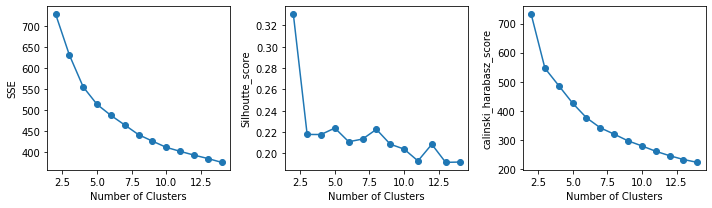

In [166]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

axes[0].plot(range(2,15), sse, marker='o')
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("SSE")

axes[1].plot(range(2,15), sh_score, marker='o')
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Silhoutte_score")

axes[2].plot(range(2,15), ch_score, marker='o')
axes[2].set_xlabel("Number of Clusters")
axes[2].set_ylabel("calinski_harabasz_score")

fig.tight_layout()
plt.show()

위에 그래프로 부터 Elbow Method시 확연하게 완만해지는 구간이 별로 보이지않고, 실루엣스코어및 칼린스키 하라바츠 스코어가 cluster가 2일 때 가장 높기때문에 cluster를 2로 결정한다.

In [167]:
clf = KMeans(n_clusters=2, random_state=1234)
clf.fit(df_scale[features])

df['kms_cluster'] = clf.labels_
df

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,kms_cluster
1,2174,1954,3,46344.0,1,1,11,1,6,2,1,2,1,1,2,5,0
2,4141,1965,4,71613.0,0,0,426,49,127,111,21,1,8,2,10,4,1
3,6182,1984,4,26646.0,1,0,11,4,20,10,3,2,2,0,4,6,0
4,5324,1981,2,58293.0,1,0,173,43,118,46,27,5,5,3,6,5,1
5,7446,1967,4,62513.0,0,1,520,42,98,0,42,2,6,4,10,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,3,26816.0,0,0,5,1,6,3,4,1,0,0,3,4,0
2234,8372,1974,2,34421.0,1,0,3,3,7,6,2,1,1,0,2,7,0
2237,7270,1981,1,56981.0,0,0,908,48,217,32,12,1,2,3,13,6,1
2238,8235,1956,4,69245.0,0,1,428,30,214,80,30,2,6,5,10,3,1


## 2. 군집분석
### 2-1. 위에서 생성한 군집들의 특성을 분석하시오

In [175]:
df['kms_cluster'].value_counts()

0    1044
1     539
Name: kms_cluster, dtype: int64

In [141]:
df.groupby('kms_cluster').mean()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
kms_cluster,,,,,,,,,,,,,,,,
0,5610.908046,1971.494253,2.720307,34984.250000,0.791188,0.462644,48.511494,4.801724,24.574713,6.779693,4.886973,2.105364,2.256705,0.580460,3.292146,6.428161
1,5524.011132,1965.068646,2.740260,62155.382189,0.089054,0.749536,508.871985,21.732839,172.285714,33.534323,22.122449,2.595547,5.899814,3.647495,8.037106,4.903525


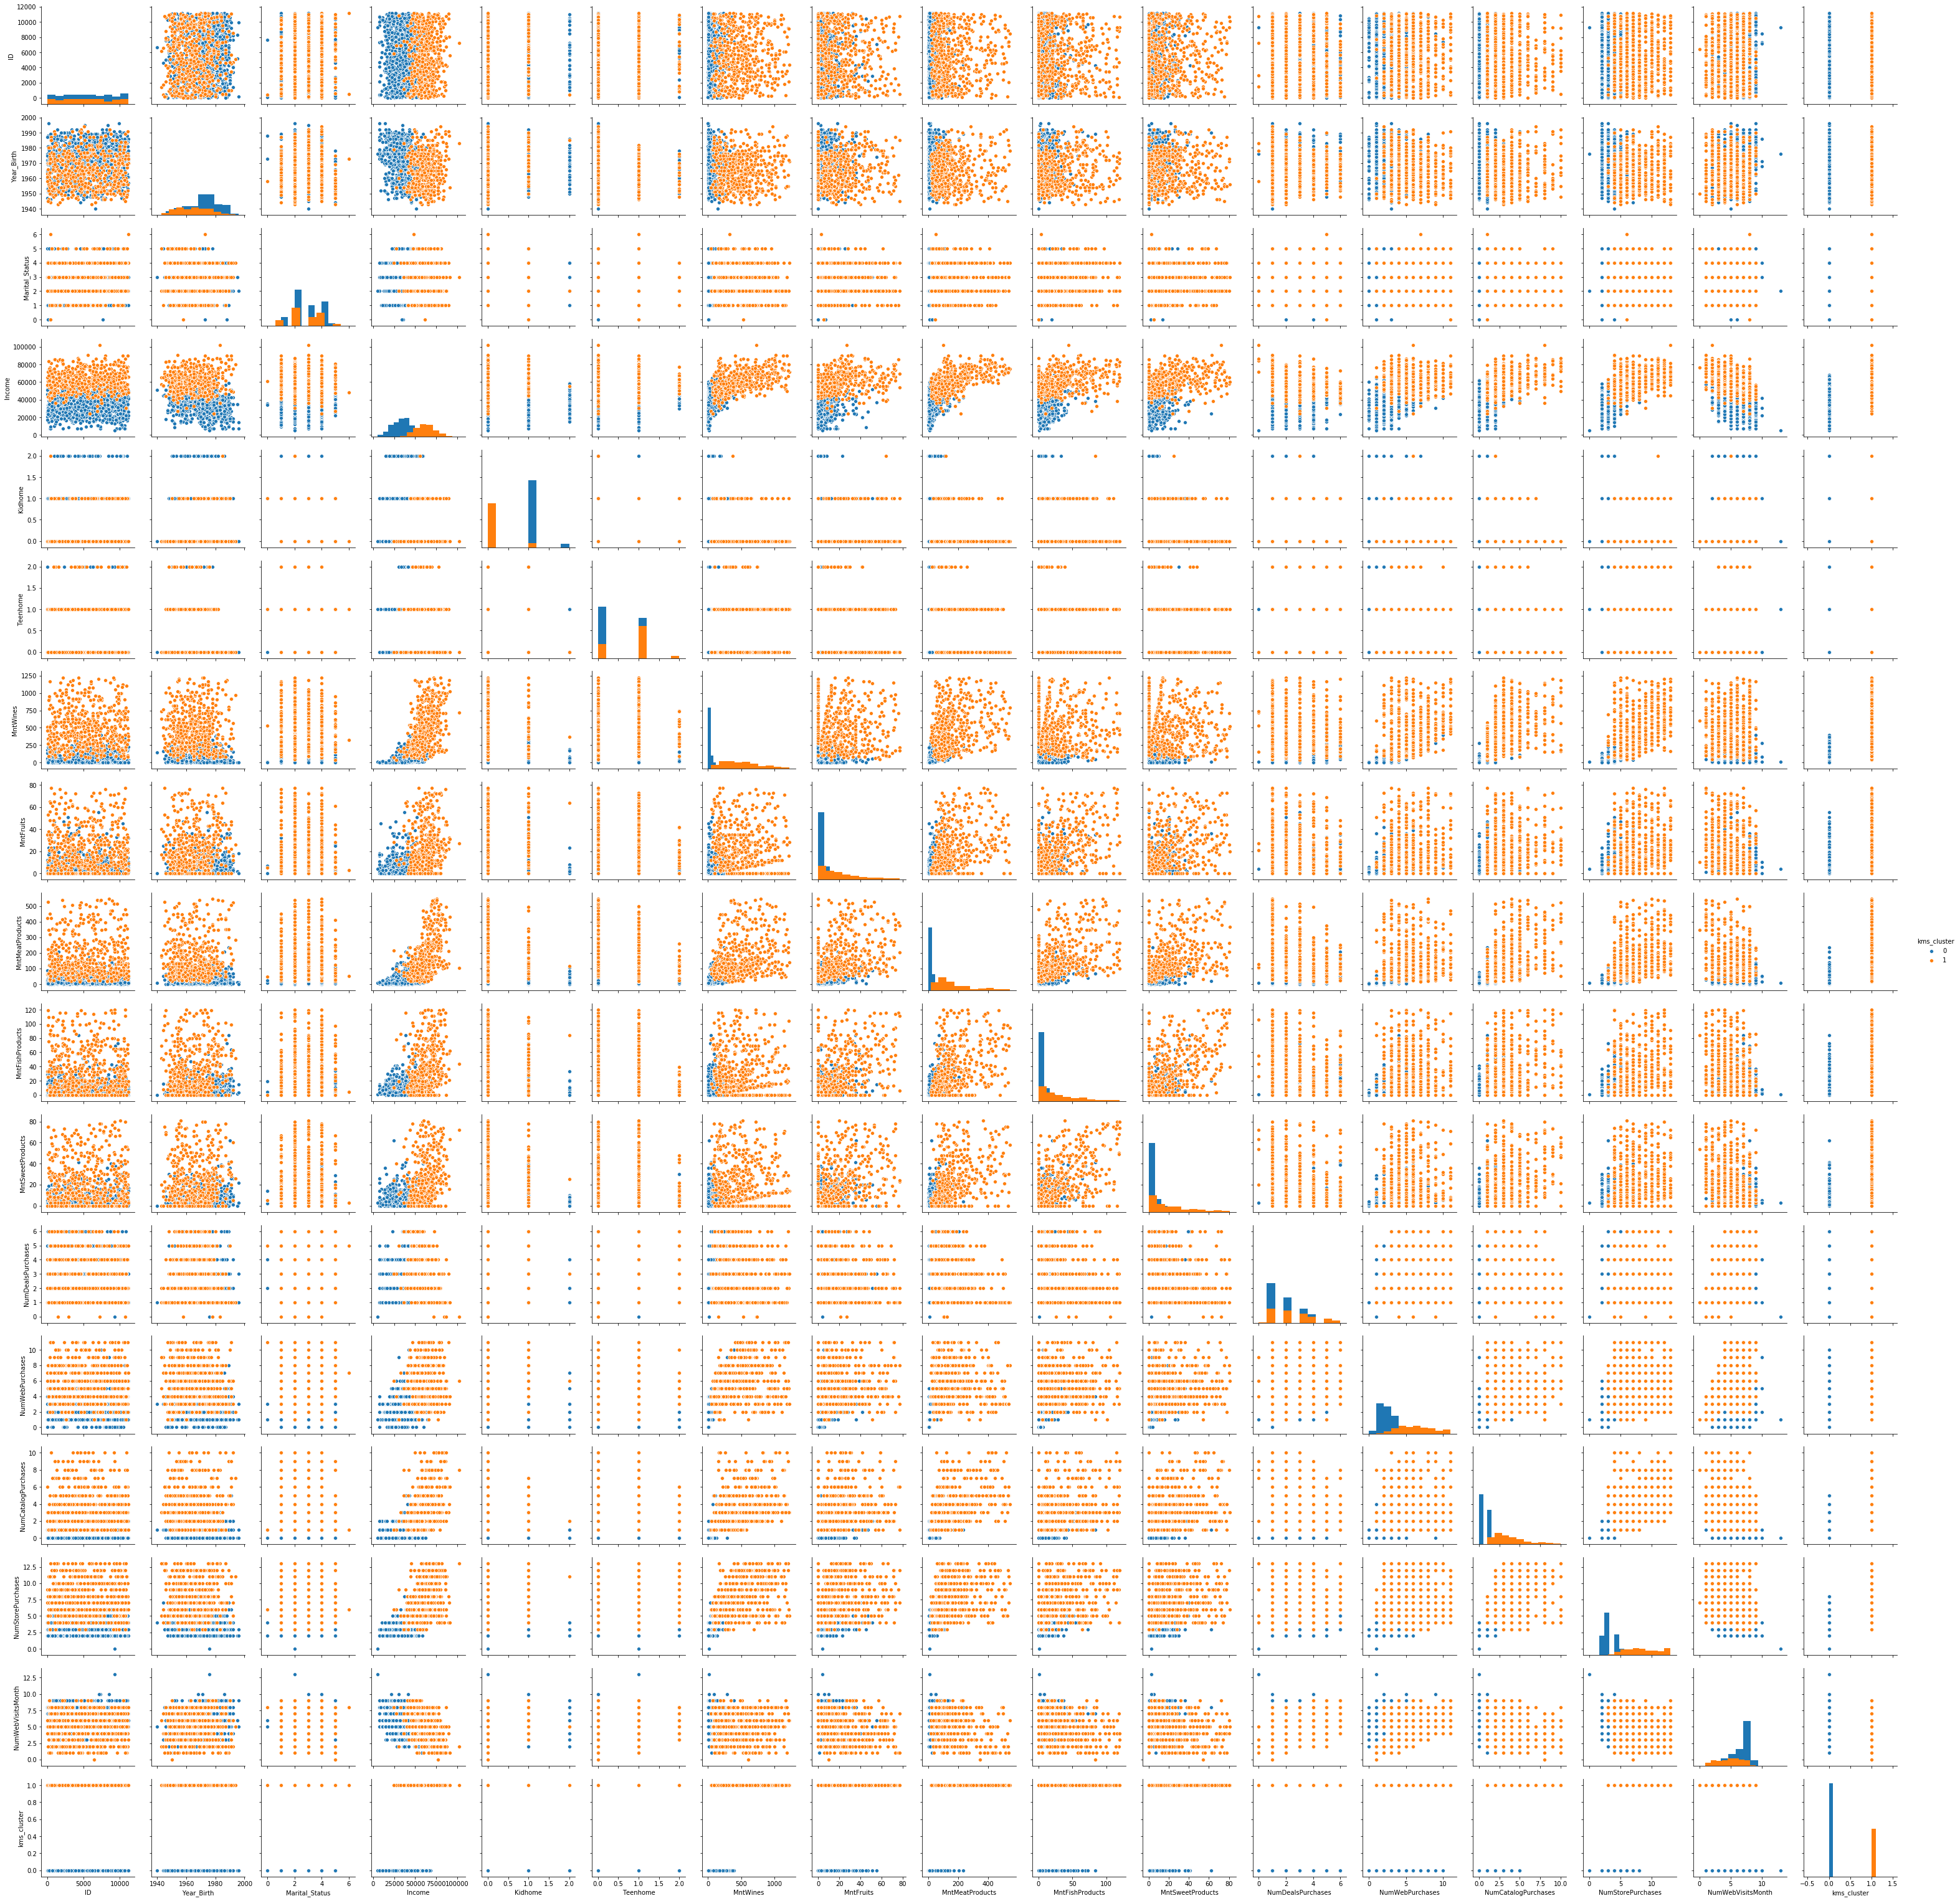

In [142]:
sns.pairplot(data = df, hue='kms_cluster', diag_kind='hist')
plt.show()

군집 0 : 수입이 낮음 / 아이수 많음 / 와인,과일,고기,생선,사탕 소비적음 / 구입수도 적음

군집 1 : 수입이 높음 / 아이수 적음 / 와인,과일,고기,생선,사탕 소비많음 / 구입수도 많음

### 2-2. 각 군집별 상품을 추천하시오

### 2-3. ID가 10870인 고객을 대상으로 상품을 추천하시오

In [172]:
df_input = df_org[df_org['ID']==10870][features]

df_input['Marital_Status'] = le.transform(df_input['Marital_Status'])

df_input

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
2235,1967,2,61223.0,0,1,709,43,182,42,118,2,9,3,4,5


In [173]:
clf.predict(df_input[features])

array([1])

cluster1에 가까움. -> 1번 군집에 맞는 상품 추천